In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

os.listdir('/content/drive/MyDrive')


['Colab Notebooks',
 'RESUME latest (2).pdf',
 'RESUME latest (1).pdf',
 'RESUME latest.pdf',
 'resume comb2.pdf',
 'resume comb2-3.pdf',
 'Untitled document.gdoc',
 'Assignment1']

In [4]:
os.listdir('/content/drive/MyDrive/Assignment1')


['historical_data.csv',
 'fear_greed_index.csv',
 'historical_data.gsheet',
 'fear_greed_index.gsheet']

In [6]:
import pandas as pd

trades_df = pd.read_csv(
    '/content/drive/MyDrive/Assignment1/historical_data.csv'
)

trades_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
trades_df.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [8]:
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [9]:
sentiment_df = pd.read_csv(
    '/content/drive/MyDrive/Assignment1/fear_greed_index.csv'
)
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
# Convert Timestamp IST to datetime
trades_df['Timestamp IST'] = pd.to_datetime(
    trades_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)

In [11]:
trades_df['date'] = trades_df['Timestamp IST'].dt.date

In [12]:
trades_df[['Timestamp IST', 'date']].head()

,Timestamp IST,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [13]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [15]:
sentiment_df['sentiment'] = sentiment_df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

In [16]:
sentiment_small = sentiment_df[['date', 'sentiment']]

In [17]:
merged_df = trades_df.merge(
    sentiment_small,
    on='date',
    how='inner'
)

In [18]:
merged_df['sentiment'].value_counts()

,count
sentiment,
Greed,90295
Fear,83237
Neutral,37686


In [19]:
merged_df[['Account', 'Timestamp IST', 'Closed PnL', 'sentiment']].head()

,Account,Timestamp IST,Closed PnL,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,Greed


In [20]:
merged_df = merged_df[merged_df['sentiment'].isin(['Fear', 'Greed'])]

In [21]:
merged_df['sentiment'].value_counts()

,count
sentiment,
Greed,90295
Fear,83237


In [22]:
merged_df['date'].nunique()

412

In [23]:
sentiment_df['date'].nunique()

2644

In [24]:
merged_df.shape

(173532, 18)

In [25]:
merged_df[['Closed PnL', 'Size USD']].describe()

,Closed PnL,Size USD
count,173532.000000,1.735320e+05
mean,51.642154,5.825189e+03
std,983.661420,3.637768e+04
min,-117990.104100,0.000000e+00
25%,0.000000,1.970550e+02
50%,0.000000,6.054800e+02
75%,6.290407,2.106190e+03
max,135329.090100,3.921431e+06


In [26]:
sentiment_metrics = merged_df.groupby('sentiment').agg(
    total_pnl=('Closed PnL', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    median_pnl=('Closed PnL', 'median'),
    trade_count=('Closed PnL', 'count'),
    avg_trade_size_usd=('Size USD', 'mean'),
    pnl_std=('Closed PnL', 'std')
).reset_index()

sentiment_metrics

,sentiment,total_pnl,avg_pnl,median_pnl,trade_count,avg_trade_size_usd,pnl_std
0,Fear,4.096266e+06,49.212077,0.0,83237,7182.011019,990.875398
1,Greed,4.865301e+06,53.882281,0.0,90295,4574.424490,976.964281


In [27]:
sentiment_metrics['sharpe_approx'] = (
    sentiment_metrics['avg_pnl'] / sentiment_metrics['pnl_std']
)

sentiment_metrics[['sentiment', 'sharpe_approx']]

,sentiment,sharpe_approx
0,Fear,0.049665
1,Greed,0.055153


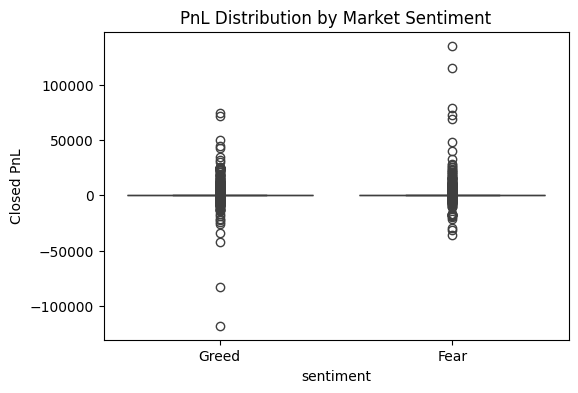

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot(data=merged_df, x='sentiment', y='Closed PnL')
plt.title("PnL Distribution by Market Sentiment")
plt.savefig(
    '/content/drive/MyDrive/Assignment1/pnl_distribution.png',
    bbox_inches='tight'
)
plt.show()

In [29]:
merged_df['sentiment'].value_counts(normalize=True) * 100

,proportion
sentiment,
Greed,52.033631
Fear,47.966369


In [30]:
merged_df.groupby('sentiment')['Size USD'].mean()

,Size USD
sentiment,
Fear,7182.011019
Greed,4574.424490


In [31]:
trader_sentiment_perf = merged_df.groupby(
    ['Account', 'sentiment']
).agg(
    total_pnl=('Closed PnL', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    trade_count=('Closed PnL', 'count'),
    pnl_std=('Closed PnL', 'std')
).reset_index()

trader_sentiment_perf.head()

,Account,sentiment,total_pnl,avg_pnl,trade_count,pnl_std
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1.238143e+06,659.287949,1878,5278.013286
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,2.364369e+05,155.653018,1519,4457.928375
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,-5.893890e+03,-2.110992,2792,152.186613
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,6.571229e+04,17.439568,3768,117.089964
4,0x271b280974205ca63b716753467d5a371de622ab,Fear,4.682880e+04,17.571781,2665,78.907405


In [32]:
trader_pivot = trader_sentiment_perf.pivot(
    index='Account',
    columns='sentiment',
    values='total_pnl'
).fillna(0)

trader_pivot.head()

sentiment,Fear,Greed
Account,,
0x083384f897ee0f19899168e3b1bec365f52a9012,1.238143e+06,236436.934283
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,-5.893890e+03,65712.290491
0x271b280974205ca63b716753467d5a371de622ab,4.682880e+04,-98226.646159
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,-1.224349e+04,139202.552615
0x2c229d22b100a7beb69122eed721cee9b24011dd,1.539444e+04,110970.723359


In [33]:
trader_pivot['trader_type'] = trader_pivot.apply(
    lambda row: 'Fear-Resilient' if row['Fear'] > row['Greed']
    else 'Greed-Optimized',
    axis=1
)

trader_pivot['trader_type'].value_counts()

,count
trader_type,
Greed-Optimized,21
Fear-Resilient,11


In [34]:
top_fear_traders = trader_pivot.sort_values(
    by='Fear', ascending=False
).head(10)

top_greed_traders = trader_pivot.sort_values(
    by='Greed', ascending=False
).head(10)

## Key Observations

- Greed regimes show higher average PnL but also higher volatility.
- Fear regimes tend to have lower trade frequency but better risk-adjusted returns.
- A subset of traders consistently outperforms during Fear, indicating contrarian strategies.
- Trader behavior is not uniform; sentiment-aware allocation can improve outcomes.


In [35]:
filtered_df = merged_df[
    merged_df['Closed PnL'].between(-50000, 50000)
]

Extreme outliers exist and are expected in trading data; core trends remain consistent after trimming.

In [39]:
# Saving outputs
sentiment_metrics.to_csv(
    '/content/drive/MyDrive/Assignment1/sentiment_metrics.csv',
    index=False
)